# Project: Investigate a Dataset (No Show Appointment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information from over 100,000 medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
 14 variables (Characteristics) associated with each observation are listed as follows:
- Patiend ID- Patients's unique identification number
- Appointment ID- Each appointment generates a unique ID
- Gender- Male or Female
- ScheduledDay- The day someone called to register the appointment(This is before the appointment)
- AppointmentDay- The day of the actual appointment where the patient is to meet with the doctor
- Age- How old the patient is
- Neighborhood- The location of the hospital
- Scholarship- Indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Familia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
- Hypertension- Whether or not the patient is hypertensive
- Diabetes- Whether or not the patient is diabetic
- Alcoholism- If the patient is an alcoholic
- Handicap- Whether or not the patient has any form of disability
- Sms Received- 1 or more messages sent to the patient probably as a reminder
- No show- Whether or not the patient showed up for their appointment as scheduled.

#### Patterns/Questions this analysis will be looking to uncover
> 1. Which Gender is most likely going to show up for their appointment and which is not.
> 2. Is age a determining factor to showing up for appointments as planned
> 3. Is the gap in time between scheduled day/time and appointment day/time a determining factor?
> 4. Are scholarship beneficiaries likely to default compared to Non beneficiaries
> 5. Are patients who receive reminders showing up than patients who do not?

_N.B. This dataset was openly sourced from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments)_

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#read in dataset
df = pd.read_csv('noshowappointments.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
#Check data structure
df.shape

(110527, 14)

In [4]:
#Check data structure and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Check for duplicates
df.duplicated().sum()

0

### Data Cleaning 
As mentioned earlier in the introductory aspect this data has 110,527 observations to be precise with 14 different variables attached to each observation.
From what we have above the major issues with this dataset appears to be data types
> - Found that the patientID is classified as float, this column is not in any way useful for analysis as a quantitative variable so I will be converting it to string.
> - Same thing applies to AppoinmentID. 
> - ScheduledDay is formatted as string instead of datetime.
> - AppointmentDay likewise is formatted as string instead of datetime.
> - There are no Null or Missing values to handle.
> - Interestingly there are no duplicates in this dataset and each observation is found to be unique
> - Create a wait time column to ascertain the number of days or hours patients had to wait for their appointment
> - Handle outliers
> - Rename and change all column headers to lowercase for consistency and to aid my analysis.

In [6]:
#Change all column headers to lowercase for consistency

#Renaming Columns
df.columns = ['PatientID','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap', 'SMS_received', 'Absent']
df.columns = df.columns.str.lower()
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [7]:
#Change Id columns to string 
df['patientid'] = df['patientid'].astype(str)
df['appointmentid'] = df['appointmentid'].astype(str)
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [8]:
#remove last two characters in the patient id 
df['patientid'] = df['patientid'].str[:-2]

In [9]:
#cheque number of unique patientid's
df['patientid'].nunique()

62299

This tells that we have 62,299 patient's with their unique id's

Proceed to addressing the issues with other data types, also create a new calculated column to know the wait time. i.e the interval between the day the appointment was scheduled and the actual day of appointment.

In [10]:
#Change scheduledday and appointmentday to datetime
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [11]:
#seperate date from time in scheduledday and appointmentday
df['scheduledate'] = df['scheduledday'].dt.date
df['scheduletime'] = df['scheduledday'].dt.time
df['appointmentdate'] = df['appointmentday'].dt.date
df['appointmenttime'] = df['appointmentday'].dt.time
df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent,scheduledate,scheduletime,appointmentdate,appointmenttime
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,2016-04-29,00:00:00
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,2016-04-29,00:00:00


In [12]:
#drop unwanted columns
column = ['scheduledday', 'appointmentday', 'scheduletime', 'appointmenttime', 'alcoholism', 'hypertension']
df.drop(labels = column, axis= 1, inplace= True)

In [13]:
#create wait time column
df['wait_time'] = df['appointmentdate'] - df['scheduledate']
df.head(3)

,patientid,appointmentid,gender,age,neighbourhood,scholarship,diabetes,handicap,sms_received,absent,scheduledate,appointmentdate,wait_time
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,0,0,0,No,2016-04-29,2016-04-29,0 days
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,No,2016-04-29,2016-04-29,0 days
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,No,2016-04-29,2016-04-29,0 days


In [14]:
df.describe()

,age,scholarship,diabetes,handicap,sms_received,wait_time
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,37.088874,0.098266,0.071865,0.022248,0.321026,10 days 04:24:31.828602965
std,23.110205,0.297675,0.258265,0.161543,0.466873,15 days 06:07:11.673762786
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


There are outliers in the age column with age -1, also we find out there are negative numbers in the wait time which should not be, we will address all these issues in the next few steps

In [15]:
#query observations with age -1
df.query('age == -1')

,patientid,appointmentid,gender,age,neighbourhood,scholarship,diabetes,handicap,sms_received,absent,scheduledate,appointmentdate,wait_time
99832,465943158731293,5775010,F,-1,ROMÃO,0,0,0,0,No,2016-06-06,2016-06-06,0 days


In [16]:
#query observations with wait_time -6 days
df.query('wait_time == "-6 days"')

,patientid,appointmentid,gender,age,neighbourhood,scholarship,diabetes,handicap,sms_received,absent,scheduledate,appointmentdate,wait_time
71533,998231581612122,5686628,F,81,SANTO ANTÔNIO,0,0,0,0,Yes,2016-05-11,2016-05-05,-6 days


In [17]:
#query observations with wait_time -1 days
df.query('wait_time == "-1 days"')

,patientid,appointmentid,gender,age,neighbourhood,scholarship,diabetes,handicap,sms_received,absent,scheduledate,appointmentdate,wait_time
27033,7839272661752,5679978,M,38,RESISTÊNCIA,0,0,1,0,Yes,2016-05-10,2016-05-09,-1 days
55226,7896293967868,5715660,F,19,SANTO ANTÔNIO,0,0,1,0,Yes,2016-05-18,2016-05-17,-1 days
64175,24252258389979,5664962,F,22,CONSOLAÇÃO,0,0,0,0,Yes,2016-05-05,2016-05-04,-1 days
72362,3787481966821,5655637,M,7,TABUAZEIRO,0,0,0,0,Yes,2016-05-04,2016-05-03,-1 days


In [18]:
#drop all observations through their respective index
df.drop([27033,55226,64175,72362], axis= 0, inplace= True)
df.drop([71533], axis= 0, inplace= True)
df.drop([99832], axis= 0, inplace= True)

In [19]:
#confirm all data are in the right types and correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   patientid        110521 non-null  object         
 1   appointmentid    110521 non-null  object         
 2   gender           110521 non-null  object         
 3   age              110521 non-null  int64          
 4   neighbourhood    110521 non-null  object         
 5   scholarship      110521 non-null  int64          
 6   diabetes         110521 non-null  int64          
 7   handicap         110521 non-null  int64          
 8   sms_received     110521 non-null  int64          
 9   absent           110521 non-null  object         
 10  scheduledate     110521 non-null  object         
 11  appointmentdate  110521 non-null  object         
 12  wait_time        110521 non-null  timedelta64[ns]
dtypes: int64(5), object(7), timedelta64[ns](1)
memory usage: 11

In [20]:
df.describe()

,age,scholarship,diabetes,handicap,sms_received,wait_time
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,37.089386,0.098271,0.071869,0.022231,0.321043,10 days 04:25:27.412889858
std,23.109885,0.297682,0.258272,0.161494,0.466879,15 days 06:07:25.262183605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
50%,37.000000,0.000000,0.000000,0.000000,0.000000,4 days 00:00:00
75%,55.000000,0.000000,0.000000,0.000000,1.000000,15 days 00:00:00
max,115.000000,1.000000,1.000000,4.000000,1.000000,179 days 00:00:00


<a id='eda'></a>
## Exploratory Data Analysis

Now that we have cleaned and trimmed our dataset, it is clean and ready for analysis, we proceed to answering all the questions posed one at a time.

### Question 1 (Which Gender is most likely going to show up for their appointment and which is not?)

In [21]:
#Check the distribution of male and female in the dataset
df['gender'].value_counts()

F    71836
M    38685
Name: gender, dtype: int64

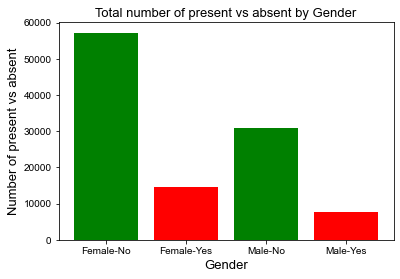

In [22]:
#plot the distribution against absence
no_show = df.groupby('gender')['absent'].value_counts()
Loc = [1,2,3,4]
my_colors = ['green','red','green','red']
plt.bar(Loc, no_show, color = my_colors)
plt.xticks([1,2,3,4], ['Female-No',"Female-Yes", "Male-No", "Male-Yes"])
plt.title('Total number of present vs absent by Gender', fontsize= 13)
plt.ylabel('Number of present vs absent', fontsize= 13)
plt.xlabel('Gender', fontsize= 13)
sns.set_style("darkgrid")

**To derive better insight we would like to look at this data in proportion, since females(65%) appear more than males(35%) in the dataset.** 

In [23]:
#get total number of male and female in dataset
tot_male = (df['gender'] == 'M').sum()
tot_female = (df['gender'] == 'F').sum()

#get total number of shows for male and female
MP = df[(df['gender'] == 'M') & (df['absent'] == 'No')]
male_pr = MP['appointmentid'].nunique()

FP = df[(df['gender'] == 'F') & (df['absent'] == 'No')]
female_pr = FP['appointmentid'].nunique()

In [24]:
#calculate the proportion of shows in relation to totals
prop_m = male_pr/tot_male

prop_f = female_pr/tot_female
(prop_m,prop_f)

(0.800361897376244, 0.7968845704103792)

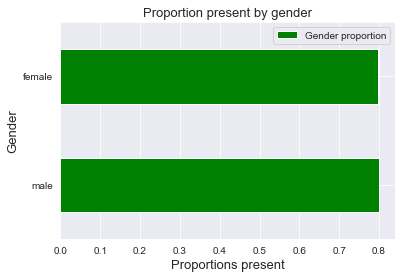

In [25]:
my_color = ['green']
data = {'Gender proportion': [prop_m, prop_f]}
Gender = pd.DataFrame(data,columns=['Gender proportion'], index = ['male', 'female'])

Gender.plot.barh(color= my_color)

plt.title('Proportion present by gender', fontsize= 13)
plt.ylabel('Gender', fontsize= 13)
plt.xlabel('Proportions present', fontsize= 13)
plt.show()

**From what we have above, we see both genders show up for their appointments in equal proportion.**

### Question 2  (Is age a determining factor to showing up for appointments as planned?)

To start with we will group the our dataset into age groups according to [statcan](https://www.statcan.gc.ca/en/concepts/definitions/age2)
- 0-14 Children
- 15-24 Youth
- 25-64 Adult
- 65+ Aged

**And also because this data is not evenly distributed, we will continue to look at proportions**

In [26]:
#divide age groups and create columns
df.loc[df['age']<=14, 'age_group'] = 'Children'
df.loc[df['age'].between(15,24), 'age_group'] = 'Youth'
df.loc[df['age'].between(25,64), 'age_group'] = 'Adult'
df.loc[df['age']>=65, 'age_group'] = 'Aged'

df.head()

,patientid,appointmentid,gender,age,neighbourhood,scholarship,diabetes,handicap,sms_received,absent,scheduledate,appointmentdate,wait_time,age_group
0,29872499824296,5642903,F,62,JARDIM DA PENHA,0,0,0,0,No,2016-04-29,2016-04-29,0 days,Adult
1,558997776694438,5642503,M,56,JARDIM DA PENHA,0,0,0,0,No,2016-04-29,2016-04-29,0 days,Adult
2,4262962299951,5642549,F,62,MATA DA PRAIA,0,0,0,0,No,2016-04-29,2016-04-29,0 days,Adult
3,867951213174,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,No,2016-04-29,2016-04-29,0 days,Children
4,8841186448183,5642494,F,56,JARDIM DA PENHA,0,1,0,0,No,2016-04-29,2016-04-29,0 days,Adult


In [27]:
#get total number for each age group
tot_children = (df['age_group'] == 'Children').sum()
tot_youth = (df['age_group'] == 'Youth').sum()
tot_adult = (df['age_group'] == 'Adult').sum()
tot_aged = (df['age_group'] == 'Aged').sum()

(tot_adult,tot_aged, tot_children, tot_youth)

(58856, 14401, 23256, 14008)

In [28]:
#get total number of shows for the age groups
CP = df[(df['age_group'] == 'Children') & (df['absent'] == 'No')]
children_pr = CP['appointmentid'].nunique()

YP = df[(df['age_group'] == 'Youth') & (df['absent'] == 'No')]
youth_pr = YP['appointmentid'].nunique()

ADP = df[(df['age_group'] == 'Adult') & (df['absent'] == 'No')]
adult_pr = ADP['appointmentid'].nunique()

AGP = df[(df['age_group'] == 'Aged') & (df['absent'] == 'No')]
aged_pr = AGP['appointmentid'].nunique()

In [29]:
#calculate the proportions of shows by age group
prop_c = children_pr/tot_children
prop_y = youth_pr/tot_youth
prop_ad = adult_pr/tot_adult
prop_ag = aged_pr/tot_aged

(prop_c, prop_y, prop_ad, prop_ag)

(0.7882266941864465, 0.747430039977156, 0.8025859725431562, 0.8450107631414485)

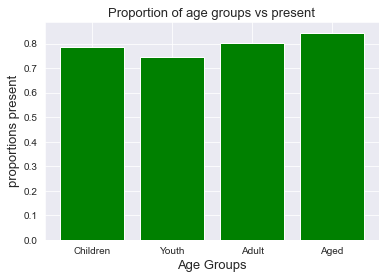

In [30]:
#plot the proportion on a bar graph
Loc = [1,2,3,4]
my_color = ['green']
plt.bar(Loc, [prop_c, prop_y, prop_ad, prop_ag], color = my_color)
plt.xticks([1,2,3,4], ['Children', 'Youth', 'Adult', 'Aged'])
plt.title('Proportion of age groups vs present', fontsize= 13)
plt.ylabel('proportions present', fontsize= 13)
plt.xlabel('Age Groups', fontsize= 13)
sns.set_style("darkgrid")

**While there is no significant difference  we can still note that the aged ones turn up a little better than patients in other age groups**

### Question 3  (Is wait time a determining factor for showing up to appointments?)

In [31]:
#change datatype to enable edit to remove string("days") from wait time
df['wait_time'] = df['wait_time'].astype(str)
df['wait_time'] = df['wait_time'].str[:-4]

In [32]:
#change datatype back to int to enable us segment data
df['wait_time'] = df['wait_time'].astype(int)

#segment the wait time into months
df.loc[df['wait_time']<=60, 'wait_group'] = '0-60days'
df.loc[df['wait_time'].between(61,120), 'wait_group'] = '61-120days'
df.loc[df['wait_time']>=121, 'wait_group'] = 'Over 120days'

In [33]:
#get total number for each wait_group
tot_g60 = (df['wait_group'] == '0-60days').sum()
tot_g120 = (df['wait_group'] == '61-120days').sum()
tot_O120 = (df['wait_group'] == 'Over 120days').sum()

In [34]:
#get total number of shows for the wait groups
WG60 = df[(df['wait_group'] == '0-60days') & (df['absent'] == 'No')]
wg60_pr = WG60['appointmentid'].nunique()

WG120 = df[(df['wait_group'] == '61-120days') & (df['absent'] == 'No')]
wg120_pr = WG120['appointmentid'].nunique()

WGO120 = df[(df['wait_group'] == 'Over 120days') & (df['absent'] == 'No')]
wgO120_pr = WGO120['appointmentid'].nunique()

In [35]:
#calculate proportional shows by wait group
prop_g60 = wg60_pr/tot_g60
prop_g120 = wg120_pr/tot_g120
prop_O120 = wgO120_pr/tot_O120

(prop_g60, prop_g120, prop_O120)

(0.799697489532031, 0.7179104477611941, 0.6588235294117647)

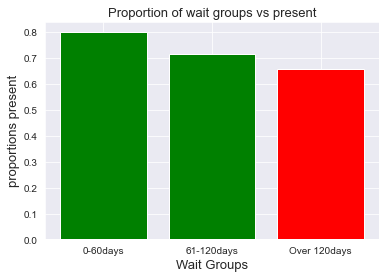

In [36]:
#plot the proportion on a bar graph
Loc = [1,2,3]
colors = ['green', 'green','red']
plt.bar(Loc, [prop_g60, prop_g120, prop_O120], color = colors)
plt.xticks([1,2,3], ['0-60days', '61-120days', 'Over 120days'])
plt.title('Proportion of wait groups vs present', fontsize= 13)
plt.ylabel('proportions present', fontsize= 13)
plt.xlabel('Wait Groups', fontsize= 13)
sns.set_style("darkgrid")

It is evident from the bar graph above that the more the wait time increases the lesser chance it is that the patient shows up for their appointment: 
- **Approximately 80% of the patients with wait-time 0-60days turn up for their appointments**
- **Approximately 72% of the patients with wait-time 61-120days turn up for their appointments**
- **And lastly just 66% of the patients with wait-time Over 120 days turn up for their appointments**

### Question 4  (Are scholarship beneficiaries likely to default compared to Non beneficiaries?)

In [37]:
#mask data into scholarship beneficiaries and non-beneficiaries
df_scholarship = df[df.scholarship == 1]
df_noscholarship =df[df.scholarship == 0]

In [38]:
#Get total number of beneficiaries and non-beneficiaries
scholarship = df_scholarship['appointmentid'].nunique()
no_scholarship = df_noscholarship['appointmentid'].nunique()
(scholarship, no_scholarship)

(10861, 99660)

In [39]:
#Get numbers present for each category
sch = df_scholarship[df_scholarship.absent == 'No']
no_sch = df_noscholarship[df_noscholarship.absent == 'No']

In [40]:
sch_pr = sch['appointmentid'].nunique()
no_sch_pr = no_sch['appointmentid'].nunique()
(sch_pr, no_sch_pr)

(8283, 79924)

In [41]:
#divide into proportions
prop_sch = sch_pr/scholarship
prop_no_sch = no_sch_pr/no_scholarship

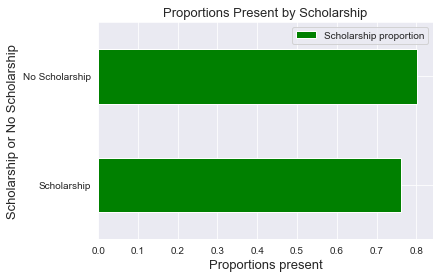

In [42]:
#visualize data in proportions
data = {'Scholarship proportion': [prop_sch, prop_no_sch]}
Scholars = pd.DataFrame(data,columns=['Scholarship proportion'], index = ['Scholarship', 'No Scholarship'])

Scholars.plot.barh(color = my_color)

plt.title('Proportions Present by Scholarship', fontsize= 13)
plt.ylabel('Scholarship or No Scholarship', fontsize= 13)
plt.xlabel('Proportions present', fontsize= 13)
plt.show()

**This goes to show patients who are not on scholarship but pay for their health needs are doing slightly better than patients who benefit from the scholarship scheme**
-  **76% of scholarship beneficiaries show up to their appointment**
-  **While 80% of non-scholarship beneficiaries show up to their appointment**

### Question 5 (Are patients who receive reminders showing up than patients who do not?)

In [43]:
#mask data into sms received and not received
df_sms = df[df.sms_received == 1]
df_nosms =df[df.sms_received == 0]

In [44]:
#Get total number of sms received and not received
sms = df_sms['appointmentid'].nunique()
nosms = df_nosms['appointmentid'].nunique()
(sms, nosms)

(35482, 75039)

In [45]:
#Get numbers present for each category
sms_yes = df_sms[df_sms.absent == 'No']
sms_no = df_nosms[df_nosms.absent == 'No']

In [46]:
sms_pr = sms_yes['appointmentid'].nunique()
nosms_pr = sms_no['appointmentid'].nunique()
(sms_pr, nosms_pr)

(25698, 62509)

In [47]:
#divide into proportions
prop_sms = sms_pr/sms
prop_nosms = nosms_pr/nosms
(prop_sms, prop_nosms)

(0.7242545516036301, 0.833020162848652)

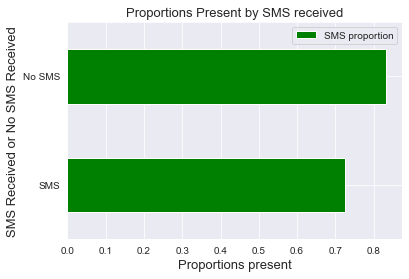

In [48]:
#visualize data in proportions
data = {'SMS proportion': [prop_sms, prop_nosms]}
Scholars = pd.DataFrame(data,columns=['SMS proportion'], index = ['SMS', 'No SMS'])

Scholars.plot.barh(color = my_color)

plt.title('Proportions Present by SMS received', fontsize= 13)
plt.ylabel('SMS Received or No SMS Received', fontsize= 13)
plt.xlabel('Proportions present', fontsize= 13)
plt.show()

**Suprisingly, patients who do not receive SMS show up better than patients who do with 83 and 72 percent respectively**

<a id='conclusions'></a>
## Conclusions
### Recap on questions asked and Key Insights

#### 1. Which Gender is most likely going to show up for their appointment and which is not.
- We found that there is no difference in the behavior of both genders, as both genders show up for appointments in equal proportions (80%).

#### 2. Is age a determining factor to showing up for appointments as planned?
- We found that there was no significant difference in how different age groups showed up for appointments but the **Aged(65+)** slightly performed better (85%) compared to other age groups, this is no suprise as aged patients mostly require medical attention and will likely take their health issues more seriously.

#### 3. Is the gap in time between scheduled day/time and appointment day/time a determining factor?
- It was evident wait time had slight effect on absence with just 66% of patient's with wait time greater than 120 days showing up to their appointment as scheduled while those with wait time 0-60days performed better with 80% shows and 61-120days with 72% shows respectively.

#### 4. Are scholarship beneficiaries likely to default compared to Non beneficiaries?
- Though the difference was not significant, non-scholarship beneficiaries who paid for their health needs tend to show up better than those who benefited from the Bolsa familia scheme. 

#### 5. Are patients who receive reminders showing up than patients who do not?
- Sms reminders did not seem to matter in determining how patients show up to their appointments, infact patient's who did not receive sms (83%) showed up to their appointment better than those who did receive sms (72%)


### LIMITATIONS
1. Most of the variables analyzed were categorical restricting the analysis to bar graphs, as there was sparsely any Quantitative data other than age.
2. After checking various documentations online and on [stackoverflow](https://stackoverflow.com/questions/10263942/is-it-guaranteed-that-false-is-0-and-true-is-1) this analysis was carried out with guarantee that 0 == False and 1 == True and this was used all through our analysis.